# Manual calibration of an SIR model (part 2)

As you might have seen, most people found different combinations of $\beta$ and $\gamma$ in the last etivity. This is because there is not enough data in the early epidemic curve alone, to identify unique values for the two parameters separately. However, the particular outbreak we are looking at is actually already over, and we have data for the following days too!

Here is the data for the full epidemic (not just the initial growth), saved in the "data" variable, with the number of infected people recorded over 14 days:

In [1]:
data <-  data.frame(time = 1:14,
                   number_infected = c(3,8,26,76,225,298,258,233,189,128,68,29,14,4))

Now, let's see what happens if we run the model again, with the parameter values we found before, but for a longer time (you can fill in your own values below, if you like). Does it still also fit the later part of the epidemic curve?

Loading required package: deSolve
Loading required package: reshape2
Loading required package: ggplot2


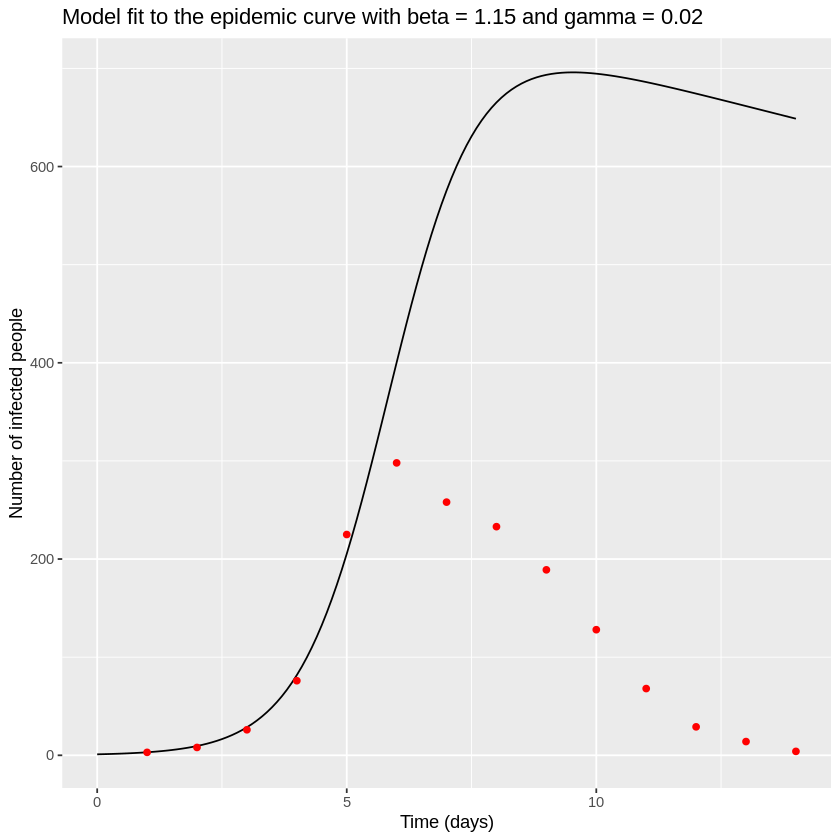

In [2]:
# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# INPUT
initial_state_values <- c(S = 762,  
                          I = 1,       
                          R = 0)

# Adding the parameters vector
parameters <- c(beta = 1.15,
                gamma = 0.02)

times <- seq(from = 0, to = 14, by = 0.1)

# MODEL FUNCTION
sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    N <- S+I+R
    
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               
    dI <- lambda * S - gamma * I
    dR <- gamma * I             
    
    # Output
    return(list(c(dS, dI, dR))) 
  })
}
    
    
# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +       # plot the model prediction of
                                                         # the number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected), 
             colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", 
                     parameters["beta"], 
                     "and gamma =", parameters["gamma"]))

As you can see, the model completely overestimates the number of infected people at later timepoints. In fact, the last datapoint the model was calibrated to was already close to the peak of the epidemic, but of course there was nothing in the data you used for the previous etivity to suggest this. Your result here might vary depending on which parameter values you found to produce the best fit in the last etivity. If you were lucky, you might have produced an epidemic curve that matches the full epidemic data more closely. But the main point remains: the limited data that you worked with in the previous etivity can give rise to a range of projected epidemic curves, not all of them consistent with how the epidemic actually developed.

Now, can you find values of $\beta$ and $\gamma$ that match the model as closely as possible to this new data, for the full epidemic curve? Use the code above and proceed in the same way as in the last etivity by manually varying the values for $\beta$ and $\gamma$, until the line of the model output closely matches the datapoints. This time, calibrate the model to the full dataset provided here. 

### Question: Which value for $\beta$ and value for $\gamma$ did you find to give the best fit to the data?

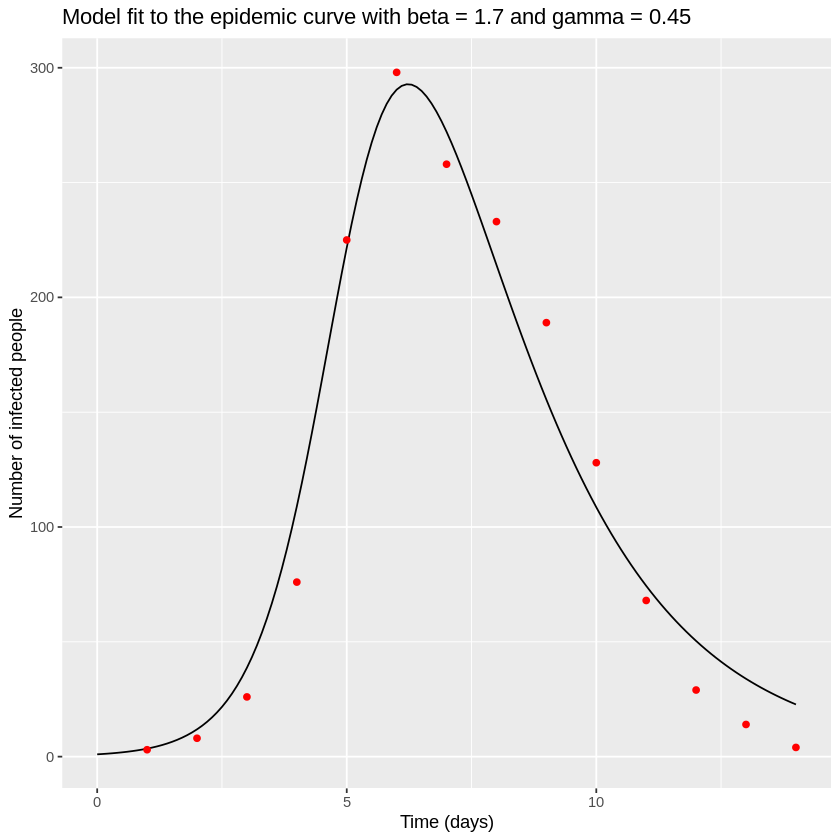

In [3]:
# The dataset
data <- data.frame(time = 1:14,
                   number_infected = c(3,8,26,76,225,298,258,233,189,128,68,29,14,4))
# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# INPUT
initial_state_values <- c(S = 762,  
                          I = 1,       
                          R = 0)

# Adding the parameters vector
parameters <- c(beta = 1.7,
                gamma = 0.45)

times <- seq(from = 0, to = 14, by = 0.1)

# MODEL FUNCTION
sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    N <- S+I+R
    
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               
    dI <- lambda * S - gamma * I
    dR <- gamma * I             
    
    # Output
    return(list(c(dS, dI, dR))) 
  })
}


    
# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +        # plot the model prediction of
                                                          # the number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected), 
             colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", parameters["beta"], 
                     "and gamma =", parameters["gamma"]))

**Background information on the dataset:**  
The dataset we use here is from a real influenza outbreak, which occurred in an English boarding school in 1978! The number infected actually represents the number of boys that were confined to bed each day.

The numbers presented here were taken from De Vries et al. (2006) and if you are interested, you can find out more about the outbreak from the original publication in the British Medical Journal.

*References:*  
Anonymous. 1978. Influenza in a boarding school. British Medical Journal 1:578.  
G. De Vries, T. Hillen, M. Lewis, J. Mueller, and B. Schoenfisch.  2006.  A Course in Mathematical Biology:  Quantitative Modeling with Mathematical and Computational Methods.  Society for Industrial and Applied Mathematics.

The value for $\beta$ and value for $\gamma$ that gave me the best fit to the data are 1.7 and 0.45 days$^{-1}$ respectively.